# Report HW3
### 0656109 黃慎航

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.DataFrame(pd.read_csv('201701.csv')).iloc[:,4:5]
df2 = pd.DataFrame(pd.read_csv('201702.csv')).iloc[:,4:5]
df3 = pd.DataFrame(pd.read_csv('201703.csv')).iloc[:,4:5]
df = pd.concat([df1,df2,df3])

In [2]:
value_air = []
value_air2 = []
for value in df['PM2.5']:
    value_air2.append(value)
    tmp = int(10 * round(value/10))#descrete by 10
    value_air.append(tmp)

## Task1:Try classification models to predict PM2.5 value:
** Input : 4 PM2.5 value (1 data / 15 min) **

** Output : PM2.5 value after 1 hour **

** Descritization : descrete by 10 , int to string **


In [21]:
df4 = pd.DataFrame(columns=['time1', 'time2', 'time3', 'time4', 'target'])
df5 = pd.DataFrame(columns=['time1', 'time2', 'time3', 'time4', 'target'])
for i in range(8524):
    df4.loc[i] = [value_air[i],value_air[i+1],value_air[i+2],value_air[i+3],str(value_air[i+7])]
    df5.loc[i] = [value_air2[i],value_air2[i+1],value_air2[i+2],value_air2[i+3],value_air2[i+7]]

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df4, test_size=0.3)
X_train = train.iloc[:,0:4]
y_train = train.iloc[:,4:5]
X_test = test.iloc[:,0:4]
y_test = test.iloc[:,4:5]

train2, test2 = train_test_split(df5, test_size=0.3)
X_train2 = train2.iloc[:,0:4]
y_train2 = train2.iloc[:,4:5]
X_test2 = test2.iloc[:,0:4]
y_test2 = test2.iloc[:,4:5]

1.K-Nearest-Neighbor ( n = 5 )

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import r2_score

knn = KNeighborsClassifier(n_neighbors=5)
%time knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

CPU times: user 22.8 ms, sys: 767 µs, total: 23.6 ms
Wall time: 24 ms
Accuracy: 0.502736512901


2.Naive Bayes ( all default )

In [6]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
%time gnb.fit(X_train, y_train.values.ravel())
y_pred = gnb.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

CPU times: user 12.8 ms, sys: 281 µs, total: 13.1 ms
Wall time: 13.2 ms
Accuracy: 0.575840500391


3.Random Forest (all default)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
%time rfc.fit(X_train, y_train.values.ravel())
y_pred = rfc.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

CPU times: user 41.4 ms, sys: 544 µs, total: 41.9 ms
Wall time: 42.3 ms
Accuracy: 0.614542611415


4.SVC ( all default )

In [8]:
from sklearn.svm import SVC
svc = SVC()
%time svc.fit(X_train, y_train.values.ravel())
y_pred = svc.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

CPU times: user 586 ms, sys: 2.88 ms, total: 589 ms
Wall time: 590 ms
Accuracy: 0.609069585614


5.Neural Network ( solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(9, 2), random_state=1 )

In [13]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(9, 2), random_state=1)
%time nn.fit(X_train, y_train.values.ravel())
y_pred = nn.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

CPU times: user 920 ms, sys: 200 ms, total: 1.12 s
Wall time: 1.05 s
Accuracy: 0.469898358092


## Conclusion for classification models:
以執行速度來看是Naive Bayes,K-Nearest-Neighbor,Random Forest,SVC,Neural Network

以精準度來看是Random Forest,SVC,Naive Bayes,K-Nearest-Neighbor,Neural Network

經過多次測試前三個大致差不多，接下來才是KNN，Neural Network則因每次random split data而不同

除了Neural Network以外表現都有60%左右，但是SVC運算時間會較久

Neural Network參數很複雜，每次重新split都要再調整hidden layer size，因此使用需要很多研究時間

## Task2 : Try regression models to predict PM2.5 value:
** Input : 4 PM2.5 value (1 data / 15 min) (float) **

** Output : PM2.5 value after 1 hour (float) **




1.Bayesian Regression (all default)

CPU times: user 2.17 ms, sys: 1.86 ms, total: 4.03 ms
Wall time: 2.3 ms
RMSE: 6.77878623598
Variance score: 0.80


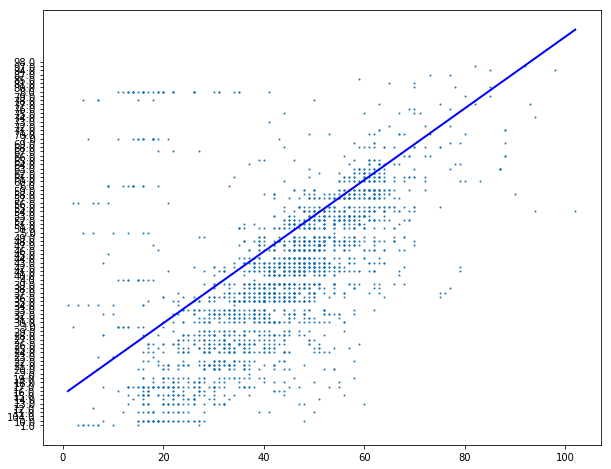

In [10]:
from sklearn import linear_model
br = linear_model.BayesianRidge()
%time br.fit(X_train2, y_train2.values.ravel())
y_pred = br.predict(X_test2)

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test2, y_pred)))
print('Variance score: %.2f' % r2_score(y_test2, y_pred))

order = np.argsort(X_test2['time1'])
xs = np.array(X_test2['time1'])[order]
ys = np.array(y_pred)[order]
fit = np.polyfit(xs,ys,1)
fit_fn = np.poly1d(fit) 

plt.figure(figsize=(10, 8))
plt.scatter(X_test2['time1'], y_test2,s=1)
plt.plot(xs, fit_fn(xs), color='blue', linewidth=2)

plt.show()

2.Decision tree Regression (all default)

CPU times: user 16 ms, sys: 1.6 ms, total: 17.6 ms
Wall time: 16.8 ms
RMSE: 8.82062281346
Variance score: 0.66


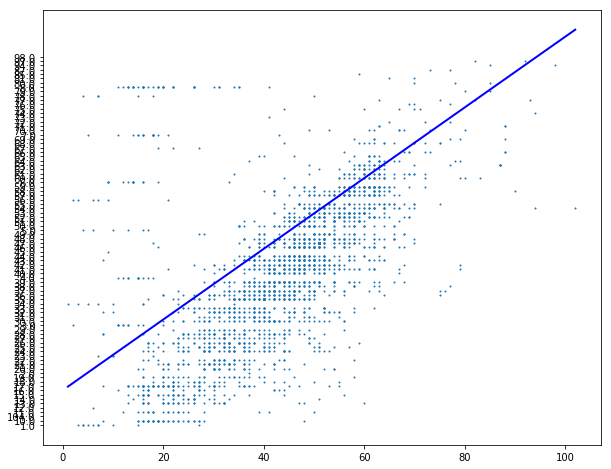

In [14]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
%time dtr.fit(X_train2, y_train2.values)
y_pred = dtr.predict(X_test2)

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test2, y_pred)))
print('Variance score: %.2f' % r2_score(y_test2, y_pred))

order = np.argsort(X_test2['time1'])
xs = np.array(X_test2['time1'])[order]
ys = np.array(y_pred)[order]
fit = np.polyfit(xs,ys,1)
fit_fn = np.poly1d(fit) 

plt.figure(figsize=(10, 8))
plt.scatter(X_test2['time1'], y_test2,s=1)
plt.plot(xs, fit_fn(xs), color='blue', linewidth=2)

plt.show()

3.SVR (all default)

CPU times: user 1.44 s, sys: 76.2 ms, total: 1.52 s
Wall time: 1.52 s
RMSE: 11.3149652646
Variance score: 0.44


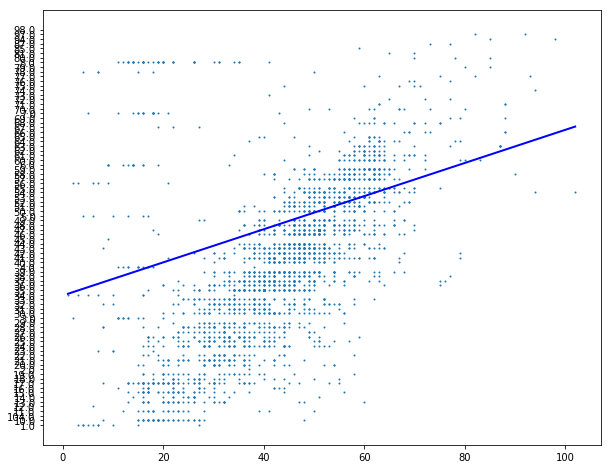

In [15]:
from sklearn.svm import SVR
svr = SVR()
%time svr.fit(X_train2, y_train2.values.ravel())
y_pred = svr.predict(X_test2)

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test2, y_pred)))
print('Variance score: %.2f' % r2_score(y_test2, y_pred))

order = np.argsort(X_test2['time1'])
xs = np.array(X_test2['time1'])[order]
ys = np.array(y_pred)[order]
fit = np.polyfit(xs,ys,1)
fit_fn = np.poly1d(fit) 

plt.figure(figsize=(10, 8))
plt.scatter(X_test2['time1'], y_test2,s=1)
plt.plot(xs, fit_fn(xs), color='blue', linewidth=2)

plt.show()

4.Linear Regression (all default)

CPU times: user 1.67 ms, sys: 724 µs, total: 2.39 ms
Wall time: 1.73 ms
RMSE: 6.77961045206
Variance score: 0.80


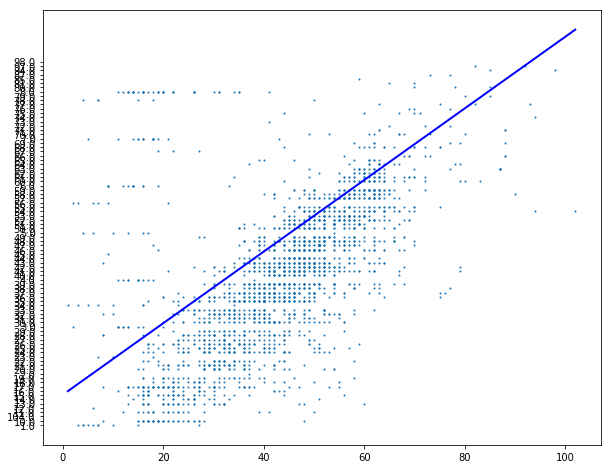

In [17]:
regr = linear_model.LinearRegression()
%time regr.fit(X_train2, y_train2.values)
y_pred = regr.predict(X_test2)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test2, y_pred)))
print('Variance score: %.2f' % r2_score(y_test2, y_pred))

order = np.argsort(X_test2['time1'])
xs = np.array(X_test2['time1'])[order]
ys = np.array(y_pred)[order]
fit = np.polyfit(xs,ys,1)
#fit_fn = np.poly1d(fit) 

plt.figure(figsize=(10, 8))
plt.scatter(X_test2['time1'], y_test2,s=1)
plt.plot(xs, fit[0] * xs + fit[1], color='blue', linewidth=2)

plt.show()

## Conclusion for task2:
以運算速度來看順序為Linear Regression,Bayesian Regression,Decision tree Regression,SVR

RMSE和Variance score都是評估Regression model的依據（RMSE越小越好，Variance score越接近1.0越好）

以精準度來看順序為Linear Regression,Bayesian Regression,Decision tree Regression,SVR

由於有四個feature所以我挑出第一個時間的value當作圖的x軸（因為都是變化不大的四個值，且都是指空氣品質）

我將y_true標上去並且畫出Regression Line(由y_pred得出）

觀察每張圖都可以明顯看出Model的結果大致與正解符合，可能是剛好這個task是具有線性關係



## Task3 : Predict PM2.5 value with one feature (PM10, PM1, Temperature, Humidity):
** Input : 1 PM2.5 value (1 data / 15 min) (float) **

** Output : PM2.5 value at that time (float) **

** Motivation : To check which feature contributes to PM2.5 . **

In [18]:
df1_2 = pd.DataFrame(pd.read_csv('201701.csv')).iloc[:,4:9]
df2_2 = pd.DataFrame(pd.read_csv('201702.csv')).iloc[:,4:9]
df3_2 = pd.DataFrame(pd.read_csv('201703.csv')).iloc[:,4:9]
df_new = pd.concat([df1_2,df2_2,df3_2])

1.Linear Regression (all default)

RMSE: 1.48181938169
Variance score: 0.99
RMSE: 1.4563216987
Variance score: 0.99
RMSE: 15.248813039
Variance score: -0.00
RMSE: 14.7296927478
Variance score: 0.07


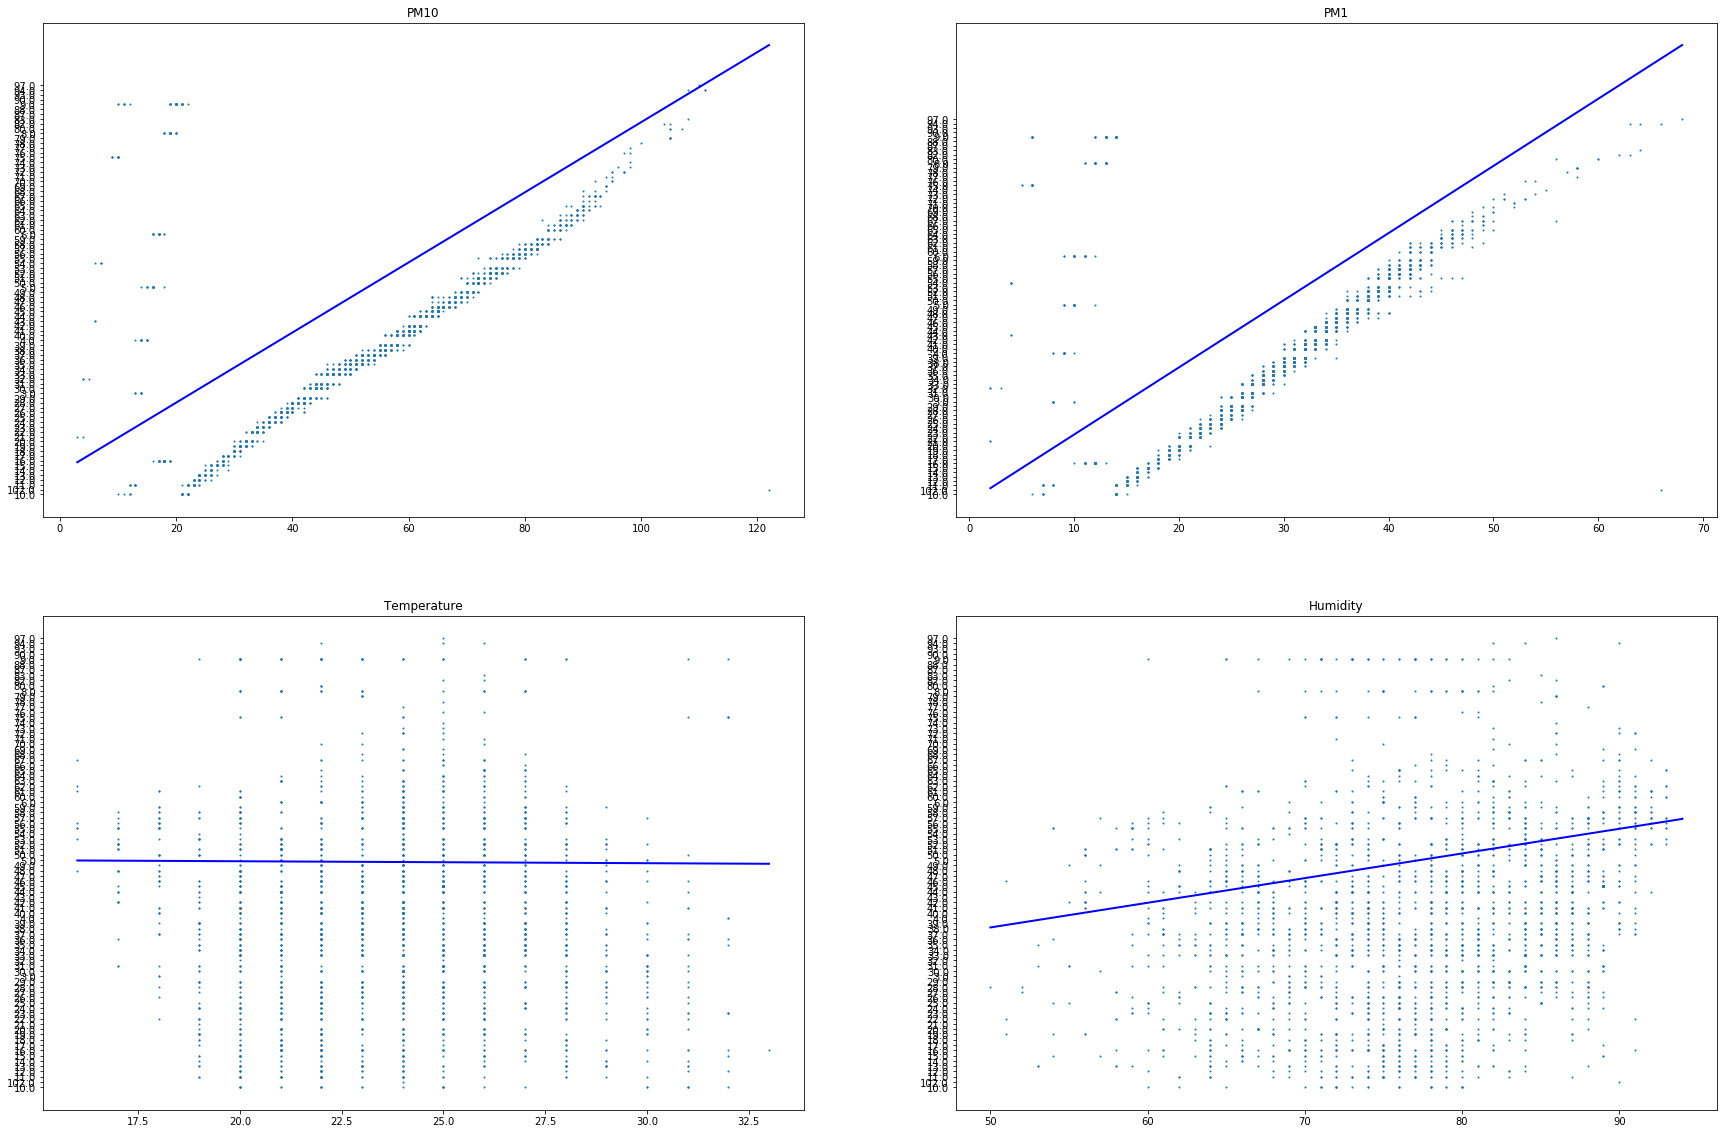

In [19]:
train3, test3 = train_test_split(df_new, test_size=0.3)
plt.figure(figsize=(30, 20))
X_train3 = train3.iloc[:,1:2]
y_train3 = train3.iloc[:,0:1]
X_test3 = test3.iloc[:,1:2]
y_test3 = test3.iloc[:,0:1]

regr.fit(X_train3, y_train3.values)
y_pred = regr.predict(X_test3)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test3, y_pred)))
print('Variance score: %.2f' % r2_score(y_test3, y_pred))

order = np.argsort(X_test3['PM10'])
xs = np.array(X_test3['PM10'])[order]
ys = np.array(y_pred)[order]
fit = np.polyfit(xs,ys,1)
#fit_fn = np.poly1d(fit) 
plt.subplot(221)
plt.scatter(X_test3['PM10'], y_test3,s=1)
plt.plot(xs, fit[0] * xs + fit[1], color='blue', linewidth=2)
plt.title('PM10')

X_train3 = train3.iloc[:,2:3]
y_train3 = train3.iloc[:,0:1]
X_test3 = test3.iloc[:,2:3]
y_test3 = test3.iloc[:,0:1]

regr.fit(X_train3, y_train3.values)
y_pred = regr.predict(X_test3)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test3, y_pred)))
print('Variance score: %.2f' % r2_score(y_test3, y_pred))

order = np.argsort(X_test3['PM1'])
xs = np.array(X_test3['PM1'])[order]
ys = np.array(y_pred)[order]
fit = np.polyfit(xs,ys,1)
#fit_fn = np.poly1d(fit) 
plt.subplot(222)
plt.scatter(X_test3['PM1'], y_test3,s=1)
plt.plot(xs, fit[0] * xs + fit[1], color='blue', linewidth=2)
plt.title('PM1')

X_train3 = train3.iloc[:,3:4]
y_train3 = train3.iloc[:,0:1]
X_test3 = test3.iloc[:,3:4]
y_test3 = test3.iloc[:,0:1]

regr.fit(X_train3, y_train3.values)
y_pred = regr.predict(X_test3)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test3, y_pred)))
print('Variance score: %.2f' % r2_score(y_test3, y_pred))

order = np.argsort(X_test3['Temperature'])
xs = np.array(X_test3['Temperature'])[order]
ys = np.array(y_pred)[order]
fit = np.polyfit(xs,ys,1)
#fit_fn = np.poly1d(fit) 
plt.subplot(223)
plt.scatter(X_test3['Temperature'], y_test3,s=1)
plt.plot(xs, fit[0] * xs + fit[1], color='blue', linewidth=2)
plt.title('Temperature')

X_train3 = train3.iloc[:,4:5]
y_train3 = train3.iloc[:,0:1]
X_test3 = test3.iloc[:,4:5]
y_test3 = test3.iloc[:,0:1]

regr.fit(X_train3, y_train3.values)
y_pred = regr.predict(X_test3)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test3, y_pred)))
print('Variance score: %.2f' % r2_score(y_test3, y_pred))

order = np.argsort(X_test3['Humidity'])
xs = np.array(X_test3['Humidity'])[order]
ys = np.array(y_pred)[order]
fit = np.polyfit(xs,ys,1)
#fit_fn = np.poly1d(fit) 
plt.subplot(224)
plt.scatter(X_test3['Humidity'], y_test3,s=1)
plt.plot(xs, fit[0] * xs + fit[1], color='blue', linewidth=2)
plt.title('Humidity')
plt.show()

2.SVR (all default)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 3.92603661362
Variance score: 0.93
RMSE: 3.86255337922
Variance score: 0.93
RMSE: 14.421704548
Variance score: 0.07
RMSE: 13.9944156065
Variance score: 0.12


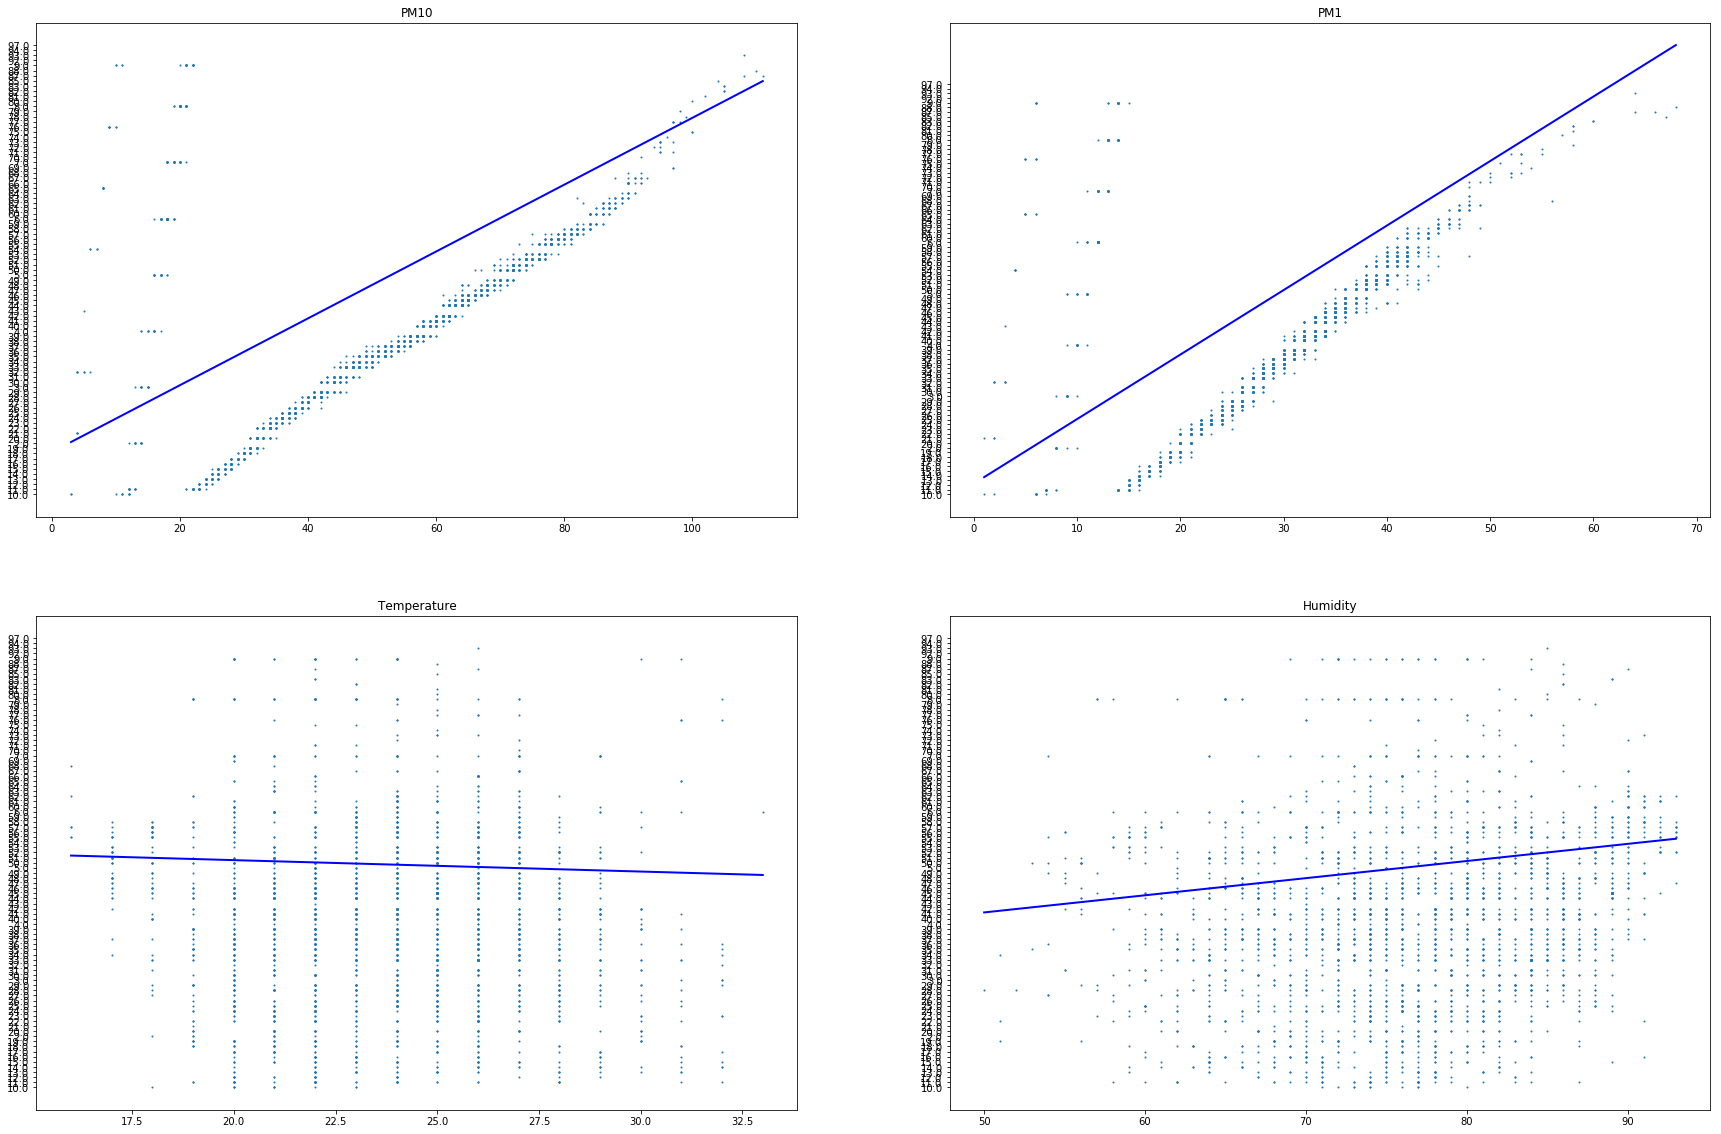

In [20]:
train3, test3 = train_test_split(df_new, test_size=0.3)
plt.figure(figsize=(30, 20))
X_train3 = train3.iloc[:,1:2]
y_train3 = train3.iloc[:,0:1]
X_test3 = test3.iloc[:,1:2]
y_test3 = test3.iloc[:,0:1]

svr.fit(X_train3, y_train3.values)
y_pred = svr.predict(X_test3)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test3, y_pred)))
print('Variance score: %.2f' % r2_score(y_test3, y_pred))

order = np.argsort(X_test3['PM10'])
xs = np.array(X_test3['PM10'])[order]
ys = np.array(y_pred)[order]
fit = np.polyfit(xs,ys,1)
#fit_fn = np.poly1d(fit) 
plt.subplot(221)
plt.scatter(X_test3['PM10'], y_test3,s=1)
plt.plot(xs, fit[0] * xs + fit[1], color='blue', linewidth=2)
plt.title('PM10')

X_train3 = train3.iloc[:,2:3]
y_train3 = train3.iloc[:,0:1]
X_test3 = test3.iloc[:,2:3]
y_test3 = test3.iloc[:,0:1]

svr.fit(X_train3, y_train3.values)
y_pred = svr.predict(X_test3)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test3, y_pred)))
print('Variance score: %.2f' % r2_score(y_test3, y_pred))

order = np.argsort(X_test3['PM1'])
xs = np.array(X_test3['PM1'])[order]
ys = np.array(y_pred)[order]
fit = np.polyfit(xs,ys,1)
#fit_fn = np.poly1d(fit) 
plt.subplot(222)
plt.scatter(X_test3['PM1'], y_test3,s=1)
plt.plot(xs, fit[0] * xs + fit[1], color='blue', linewidth=2)
plt.title('PM1')

X_train3 = train3.iloc[:,3:4]
y_train3 = train3.iloc[:,0:1]
X_test3 = test3.iloc[:,3:4]
y_test3 = test3.iloc[:,0:1]

svr.fit(X_train3, y_train3.values)
y_pred = svr.predict(X_test3)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test3, y_pred)))
print('Variance score: %.2f' % r2_score(y_test3, y_pred))

order = np.argsort(X_test3['Temperature'])
xs = np.array(X_test3['Temperature'])[order]
ys = np.array(y_pred)[order]
fit = np.polyfit(xs,ys,1)
#fit_fn = np.poly1d(fit) 
plt.subplot(223)
plt.scatter(X_test3['Temperature'], y_test3,s=1)
plt.plot(xs, fit[0] * xs + fit[1], color='blue', linewidth=2)
plt.title('Temperature')

X_train3 = train3.iloc[:,4:5]
y_train3 = train3.iloc[:,0:1]
X_test3 = test3.iloc[:,4:5]
y_test3 = test3.iloc[:,0:1]

svr.fit(X_train3, y_train3.values)
y_pred = svr.predict(X_test3)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test3, y_pred)))
print('Variance score: %.2f' % r2_score(y_test3, y_pred))

order = np.argsort(X_test3['Humidity'])
xs = np.array(X_test3['Humidity'])[order]
ys = np.array(y_pred)[order]
fit = np.polyfit(xs,ys,1)
#fit_fn = np.poly1d(fit) 
plt.subplot(224)
plt.scatter(X_test3['Humidity'], y_test3,s=1)
plt.plot(xs, fit[0] * xs + fit[1], color='blue', linewidth=2)
plt.title('Humidity')
plt.show()

## Conclusion for task3:
此預測原本是想測試藉由沒有PM2.5的feature的其他四個feature來預測是否可行

結果準確率極高，於是我就分開來一個一個測

發現PM10,PM1對於PM2.5的預測貢獻最高

然而溫度和濕度卻幾乎沒有關係

利用了兩個Regression Model驗證此現象

PM10,PM1和PM2.5一樣都是空氣品質的評估數據

分別代表不同的空氣微粒大小

但不同的空氣微粒大小的濃度卻有高度正相關並且可以互相預測

推測空氣的變化應該不是從微粒小變成微粒大

而是大的和小的都會同步增加